Salem Ameen, PhD student at Salford University

### Parkinsons Telemonitoring Data Set

Deep learning Regression

# Import the Libraries

General Library

In [1]:
import numpy as np
import pandas
from numpy import *
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_selection
 
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics, grid_search, cross_validation
from IPython.display import set_matplotlib_formats
from bokeh.plotting import figure, show, output_notebook
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from bokeh.layouts import gridplot
output_notebook()
set_matplotlib_formats('png', 'pdf')
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)

Loading BokehJS ...

Deep Learning Library

In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


# Create the model

In [8]:
# define base mode
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=20, init='normal', activation='relu'))
	model.add(Dense(1, init='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# Load data

In the previous file we have not change the data as there is no missing value or add any new parameters so it can be downloaded from the web directly. 

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
data = pd.read_csv(url)
M_UPDRS = data['motor_UPDRS']
data = data.drop('motor_UPDRS', 1)
data = data.drop('total_UPDRS', 1)
from sklearn import preprocessing
dataset = data.values
X = dataset[:,0:20].astype(float)
Y = M_UPDRS.values
MEDV = M_UPDRS
feature_cols = list(data.columns.values)
print 'Number of examples',len(X)

Number of examples 5875


In [10]:
# Make developement dataset for genrilization and final testing
from sklearn.cross_validation import train_test_split
# Extracting 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0)
X = X_train
Y = y_train
new_data      = X_train
new_test_data = X_test
print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)

Number of training examples 4700
Number of validation examples 1175


# deep learning model

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
model = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)


In [12]:
kfold = KFold(n=len(X), n_folds=10, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 27.46 (3.86) MSE


In [13]:
predicted = cross_val_predict(model, X, Y, cv=kfold)
r_squared = r2_score(Y, predicted, multioutput='variance_weighted')
print 'R-squared = ',r_squared

R-squared =  0.535053639936


# Set the parameters for cross validation

In [14]:
num_folds = 10
num_instances = len(X)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

 # Set the parameters for bias-variance dilemma

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Preprocessing the data and save both the model and preprocessed data

In [16]:
# According to the nature of the data spasity and there is outliter RobustScaler class is recomandit 
# but when I tried both of them the result seems is same
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # use same transform for testing data
X = X_train

In [18]:
# save transformed data
np.save('./data/X_train', X_train)
np.save('./data/y_train', y_train)
np.save('./data/X_test', X_test)
np.save('./data/y_test', y_test)

In [19]:
# save the model scaler to the desk
from sklearn.externals import joblib
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl', 'scaler.pkl_01.npy', 'scaler.pkl_02.npy', 'scaler.pkl_03.npy']

In [20]:
# Test the model if it is work
scalerTest = joblib.load('scaler.pkl')
new_data_scaled = scalerTest.transform(new_test_data)
print " =================================================================>>>>> done"
print new_data_scaled

 =================================================================>>>>> done
[[ 1.56638181  0.35745305  1.45347266 ...,  0.10654841  0.65433521
   0.34236736]
 [ 1.08416036  0.69933936 -0.68800744 ...,  1.03217561  1.35448669
   2.09798914]
 [ 0.11971746 -0.66820588  1.45347266 ..., -0.37688437  0.55760283
  -0.48973219]
 ..., 
 [ 1.56638181  0.35745305  1.45347266 ...,  1.28447486 -0.04104284
   0.85186293]
 [-1.24657665 -0.21235747 -0.68800744 ...,  0.08110981 -0.87695661
   0.46320715]
 [ 0.11971746 -0.66820588  1.45347266 ...,  0.38418689  0.68227388
   0.30398295]]


# 1. model  with   Regression

Deep learning or the Classification and Regression Trees (CART as they are know) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression Deep learning is the mean squared error, specified in the criterion parameter.

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=20, init='normal', activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, init='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
# Actual modelling
model.fit(X, Y, verbose=0, batch_size=20, nb_epoch=300)

## Coefficients Of Determination {Calculating R^2}

R^2, Close to one is better

In [31]:
predicted = model.predict(X)
r_squared = r2_score(Y, predicted, multioutput='variance_weighted')
print 'R-squared = ',r_squared

R-squared =  0.916269269782


In [32]:
prediction = predicted.ravel()

In [33]:
shape(predicted)

(4700, 1)

In [34]:
shape(prediction)

(4700,)

In [35]:
shape(Y)

(4700,)

## Residual Plot

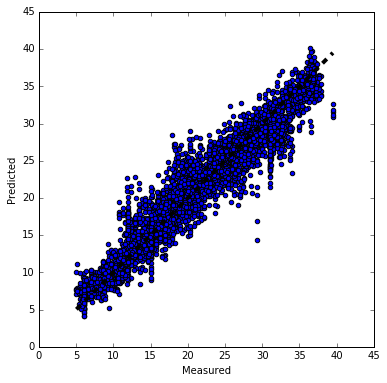

In [36]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [37]:
# Plotining using bokeh
#TOOLS = [BoxSelectTool(), HoverTool()]
#TOOLS = 'hover,box_zoom,box_select,crosshair,resize,reset,model_select,pan,save,poly_select,tap,wheel_zoom,undo'
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
p = figure(plot_width=500, plot_height=500, tools=TOOLS)
p.scatter(Y, prediction,x="jjj", marker="o", color="#80B1D3", line_width=3)
p.title.align = "center"
p.xaxis.axis_label = "Measured"
p.xaxis.axis_label_text_color = "#aa6666"
#p.xaxis.axis_label_standoff = 30
p.xaxis.major_tick_line_color = "firebrick"
p.xaxis.major_tick_line_width = 3
p.xaxis.minor_tick_line_color = "orange"
p.yaxis.axis_label = "Predicted"
p.yaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_color = "#aa6666"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
#p.line([Y.min(), Y.max()], [Y.min(), Y.max()], line_dash="4 4", line_width=2, color='red')

# create a new plot with the toolbar below
# line_dash="4 4", line_width=2, color='red'
p.line([Y.min(), Y.max()], [Y.min(), Y.max()], line_dash="4 4", line_width=2, line_color="black")
show(p)

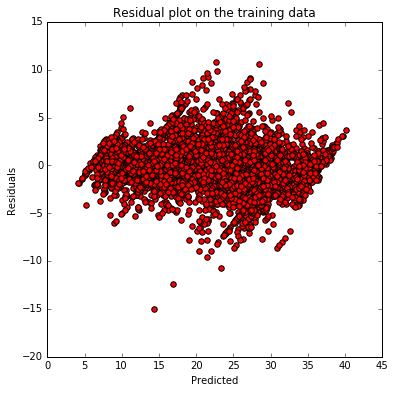

In [38]:
plt.scatter(predicted, (predicted.T - Y), c='r', s=30)
plt.title("Residual plot on the training data")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

In [39]:
# Plotining using bokeh
#TOOLS = 'hover,box_zoom,box_select,crosshair,resize,reset,model_select,pan,save,poly_select,tap,wheel_zoom,undo'
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
p = figure(plot_width=500, plot_height=500, title="Residual plot on the training data", tools=TOOLS)
p.scatter(prediction, (prediction - Y),x="jjj", marker="o", color="#80B1D3", line_width=3)
p.title.align = "center"
p.xaxis.axis_label = "Predicted"
p.xaxis.axis_label_text_color = "#aa6666"
#p.xaxis.axis_label_standoff = 30
p.xaxis.major_tick_line_color = "firebrick"
p.xaxis.major_tick_line_width = 3
p.xaxis.minor_tick_line_color = "orange"
p.yaxis.axis_label = "Residuals"
p.yaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_color = "#aa6666"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
#p.line([2,38], [0, 0], line_dash="4 4", line_width=2, color='red')
show(p)

In [40]:
# Using make_pipeline
from sklearn.pipeline import make_pipeline

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
DLRegressor = make_pipeline(scaler, model)
DLRegressor.fit(new_data, Y)
prediction = DLRegressor.predict(new_data)
r_squared = r2_score(Y, prediction, multioutput='variance_weighted')
print 'R-squared = ',r_squared

Epoch 1/10
4700/4700 [==============================] - 0s - loss: 5.6345     
Epoch 2/10
4700/4700 [==============================] - 0s - loss: 5.6545     
Epoch 3/10
4700/4700 [==============================] - 0s - loss: 5.6571     
Epoch 4/10
4700/4700 [==============================] - 0s - loss: 5.6565     
Epoch 5/10
4700/4700 [==============================] - 0s - loss: 5.6228     
Epoch 6/10
4700/4700 [==============================] - 0s - loss: 5.8118     
Epoch 7/10
4700/4700 [==============================] - 0s - loss: 5.8257     
Epoch 8/10
4700/4700 [==============================] - 0s - loss: 5.6890     
Epoch 9/10
4700/4700 [==============================] - 0s - loss: 5.6058     
Epoch 10/10
4700/4700 [==============================] - 0s - loss: 5.6934     
R-squared =  0.916720005799


### Save the Pipeline model for developement

## I can save keras in pipleine

In [41]:
model.save_weights('Boston_House_Modelbest.hdf5',overwrite=True)

In [42]:
# Test the model if it is work
model.load_weights('Boston_House_Modelbest.hdf5')

NewPred = model.predict(X)
print " =================================================================>>>>> done"
r_squared = r2_score(Y, NewPred, multioutput='variance_weighted')
print 'R-squared = ',r_squared

 =================================================================>>>>> done
R-squared =  0.916720005799


In [43]:
# test on single data point, randomly choose point number 55
print 'Point of training data before normalization\n',new_data[55]
print '\nThe read target of the data = ', Y[55]


Point of training data before normalization
[  2.60000000e+01   4.90000000e+01   0.00000000e+00   3.17820000e+01
   1.18000000e-02   1.27000000e-04   7.05000000e-03   6.00000000e-03
   2.11500000e-02   5.81300000e-02   5.27000000e-01   3.21500000e-02
   3.45600000e-02   4.39900000e-02   9.64400000e-02   3.43700000e-02
   1.74210000e+01   6.30040000e-01   7.72870000e-01   4.15090000e-01]

The read target of the data =  25.706


In [44]:
X[55]

array([ 0.36082819, -1.80782691, -0.68800744, -1.13735157,  1.03608675,
        2.30963702,  1.32298879,  0.75598969,  1.32297758,  0.94850744,
        0.95033917,  1.14888754,  0.87292022,  0.83968192,  1.14863381,
        0.04269965, -0.98929498,  0.8769604 ,  1.67697476,  2.13188989])

In [45]:
# Test the model if it is work
scalerTest = joblib.load('scaler.pkl')
new_data_scaled = scalerTest.transform(new_data[55].reshape(1, -1))
print " =================================================================>>>>> done"
print new_data_scaled

 =================================================================>>>>> done
[[ 0.36082819 -1.80782691 -0.68800744 -1.13735157  1.03608675  2.30963702
   1.32298879  0.75598969  1.32297758  0.94850744  0.95033917  1.14888754
   0.87292022  0.83968192  1.14863381  0.04269965 -0.98929498  0.8769604
   1.67697476  2.13188989]]


In [46]:
NewPred = model.predict(new_data_scaled, verbose=0)
print '\nThe Predicted target of the data = ', NewPred


The Predicted target of the data =  [[ 24.63124084]]


## Conclusion 